In [2]:
from src.hough_circle.hough_circle import hough_circle, sobel
from src.hough_circle.detect_extremes import detect_extreme_points, to_bit_array

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

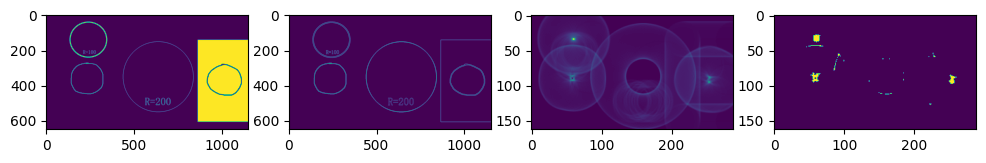

circles detected at: [235.5 911. ] [242. 882.] [254. 620.] [254. 658.] [264. 398.] [334. 738.] [372. 738.] [380. 542.] [449. 607.] [511. 890.]


In [4]:
# shape detection params
normalize = False
threshold = 10
max_cluster_size = 6
leap_size = 3
shrink_factor = 4

radius = 100

img = np.array(Image.open("test_samples/hough_test.png").convert("L"))
# edge detection - optional
edges = sobel(img, small_kernel=True)

hough = hough_circle(edges, radius, shrink_factor=shrink_factor)
bits  = to_bit_array(hough, threshold=threshold, normalize=normalize)

images_to_display = [img, edges, hough, bits]
fig = plt.figure(figsize=(12, 40))

for i, img in enumerate(images_to_display):
    fig.add_subplot(1, len(images_to_display), i+1)
    plt.imshow(img)
plt.show()

print("circles detected at:", *detect_extreme_points(hough, 
                                                     threshold=threshold, 
                                                     max_cluster_size=max_cluster_size, 
                                                     leap_size=leap_size, 
                                                     normalize=normalize,
                                                     shrink_factor=shrink_factor))

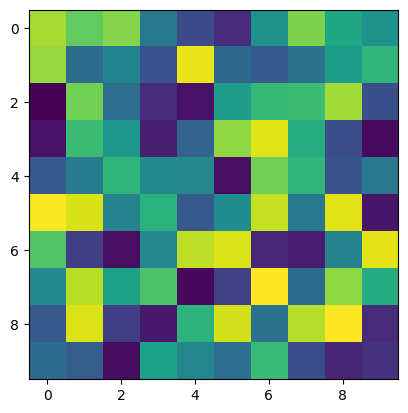

In [3]:
array = np.random.rand(10, 10)*2
plt.imshow(array)

In [4]:
detect_extreme_points(array)

[array([0., 2.]), array([0., 7.]), array([1., 4.]), array([2., 8.])]